In [1]:
import pandas as pd
import numpy as np
import wget
import zipfile
import os
import tqdm as tqdm
import matplotlib.pyplot as plt
import random
import scipy as sp
import scipy.misc

## Downloader datasets

In [2]:
dataset_downloader = pd.read_csv("mchar_data_list_0515.csv")
dataset_downloader.head()

,file,size,link
0,mchar_train.zip,345.91MB,http://tianchi-competition.oss-cn-hangzhou.ali...
1,mchar_train.json,3.16MB,http://tianchi-competition.oss-cn-hangzhou.ali...
2,mchar_val.zip,200.16MB,http://tianchi-competition.oss-cn-hangzhou.ali...
3,mchar_val.json,1.03MB,http://tianchi-competition.oss-cn-hangzhou.ali...
4,mchar_test_a.zip,370.6MB,http://tianchi-competition.oss-cn-hangzhou.ali...


In [3]:
for url in dataset_downloader['link']:
    filename = wget.download(url, out='train')

100% [............................................................................] 520020 / 520020

In [26]:
file_names=[i for i in os.listdir('train') if 'zip' in i]
for file_ in file_names:
    extracting = zipfile.ZipFile('train/'+file_)
    extracting.extractall('train/')

KeyboardInterrupt: 

## Check picture

[[ 77  81]
 [219 219]
 [246 323]
 [ 81  96]
 [  1   9]]


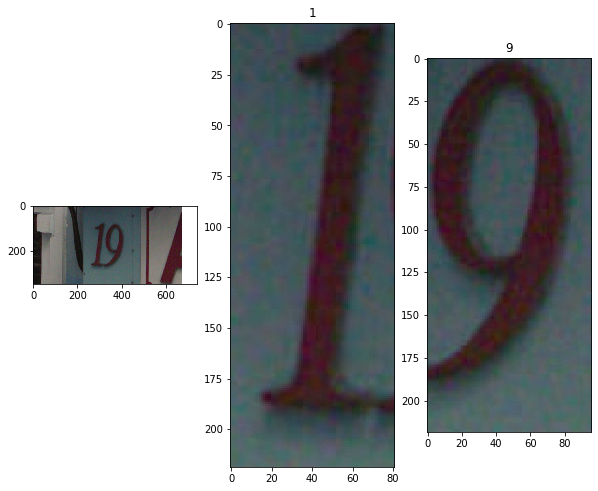

In [3]:
import json
import cv2
import matplotlib.pyplot as plt
train_json = json.load(open('train/mchar_train.json'))
def parse_json(d):
    arr = np.array([d['top'], d['height'], d['left'],  d['width'], d['label']])
    arr = arr.astype(int)
    return arr
img = cv2.imread('train/mchar_train/000000.png')
arr = parse_json(train_json['000000.png'])
print(arr)
plt.figure(figsize=(10, 10))
plt.subplot(1, arr.shape[1]+1, 1)
plt.imshow(img)

for idx in range(arr.shape[1]):
    plt.subplot(1, arr.shape[1]+1, idx+2) #(row,col,pos)
    plt.imshow(img[arr[0, idx]:(arr[0, idx]+arr[1, idx]),arr[2, idx]:(arr[2, idx]+arr[3, idx])])
    plt.title(arr[4, idx])

## Load data
#### according to each number

In [4]:
def parse_json(d):
    arr = np.array([d['top'], d['height'], d['left'],  d['width'], d['label']])
    arr = arr.astype(int)
    return arr

In [7]:
def load_data(path,train_json):
    
    training_class_folders = [i for i in os.listdir(path) if not i.startswith('.')]
    # Initialise arrays for data storage
    X_data = np.ndarray((0, input_shape[0], input_shape[1]), dtype=np.float)
    y_data= np.ndarray(0, dtype=np.int)
    
    count=0
    for i,image_file in enumerate(training_class_folders):
        count+=1
        if count%100==0:
            print("%d figures has loaded"%count)
        img_encode = cv2.imread(path+image_file,0)
        arr = parse_json(train_json[image_file])
        arr = np.maximum(arr, 0)
        X_data_part = np.ndarray((arr.shape[1], input_shape[0], input_shape[1]), dtype=np.float)
        for idx in range(arr.shape[1]):            
            sub_image = img_encode[arr[0, idx]:(arr[0, idx]+arr[1, idx]),arr[2, idx]:(arr[2, idx]+arr[3, idx])]
            image = sub_image
            image = cv2.resize(image, (img_height, img_width), interpolation=cv2.INTER_CUBIC)
            
            X_data_part[idx] = image
            X_data_part[idx] = X_data_part[idx]/255
            y_data = np.append(y_data, arr[-1, idx])

        X_data = np.append(X_data, X_data_part, axis=0)
    return (X_data,y_data)


In [8]:
img_width, img_height = 45,45
input_shape=(img_width, img_height)
train_json = json.load(open('train/mchar_train.json'))
(X_train,y_train)=load_data('train/mchar_train/',train_json)


100 figures has loaded
200 figures has loaded
300 figures has loaded
400 figures has loaded
500 figures has loaded
600 figures has loaded
700 figures has loaded
800 figures has loaded
900 figures has loaded
1000 figures has loaded
1100 figures has loaded
1200 figures has loaded
1300 figures has loaded
1400 figures has loaded
1500 figures has loaded
1600 figures has loaded
1700 figures has loaded
1800 figures has loaded
1900 figures has loaded
2000 figures has loaded
2100 figures has loaded
2200 figures has loaded
2300 figures has loaded
2400 figures has loaded
2500 figures has loaded
2600 figures has loaded
2700 figures has loaded
2800 figures has loaded
2900 figures has loaded
3000 figures has loaded
3100 figures has loaded
3200 figures has loaded
3300 figures has loaded
3400 figures has loaded
3500 figures has loaded
3600 figures has loaded
3700 figures has loaded
3800 figures has loaded
3900 figures has loaded
4000 figures has loaded
4100 figures has loaded
4200 figures has loaded
4

In [9]:
X_train_modify=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
np.savetxt('train/X_train.csv', X_train_modify, delimiter = ',')

In [10]:
np.savetxt('train/y_train.csv', y_train, delimiter = ',') 

In [11]:
X_train=np.loadtxt("train/X_train.csv",delimiter=",")

In [12]:
X_train = X_train.reshape(X_train.shape[0],45,45)
y_train=np.loadtxt("train/y_train.csv",delimiter=",")

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  # Remove the CWD from sys.path while we load stuff.


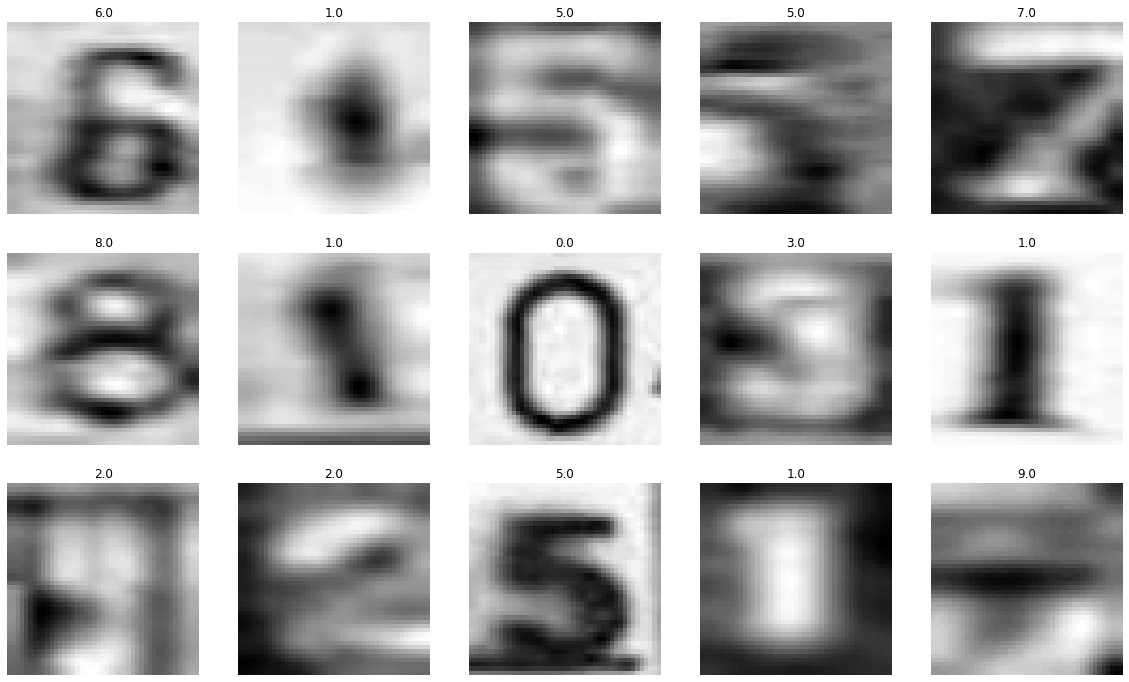

In [13]:
pltsize=4
row_images = 3
col_images = 5
plt.figure(figsize=(col_images*pltsize, row_images*pltsize))
#randomly print some sample images
for i in range(row_images * col_images):
    i_rand = random.randint(0, X_train.shape[0]-1)
    plt.subplot(row_images,col_images,i+1)
    plt.axis('off')
    plt.imshow(scipy.misc.toimage(X_train[i_rand]),cmap='gray')
    plt.title(y_train[i_rand])

In [41]:
X_train_augmentation = np.zeros((X_train.shape[0]*2,X_train.shape[1],X_train.shape[2]))
y_train_augmentation = np.zeros((y_train.shape[0]*2))

In [44]:
for i in range(X_train.shape[0]):
    X_train_augmentation[2*i,:,:] = X_train[i,:,:]
    X_train_augmentation[2*i+1,:,:] = 1-X_train[i,:,:]
    y_train_augmentation[2*i] = y_train[i]
    y_train_augmentation[2*i+1] = y_train[i]

## X_train_augmentation，y_train_augmentation